In [1]:
import pandas as pd

# Read Excel file (change this path to where your dataset is located)
df = pd.read_csv('../Dataset/EarthQuake-Data.csv')

df.columns = ["Latitude", "Longitude", "Depth", "Magnitude", "Location","Date","Time"]

# Display the first 5 rows of the dataset
display(df)


,Latitude,Longitude,Depth,Magnitude,Location,Date,Time
0,29.06,77.42,5.0,2.5,"53km NNE of New Delhi, India",2021-07-31,09:43:23
1,19.93,72.92,5.0,2.4,"91km W of Nashik, Maharashtra, India",2021-07-30,23:04:57
2,31.50,74.37,33.0,3.4,"49km WSW of Amritsar, Punjab, India",2021-07-30,21:31:10
3,28.34,76.23,5.0,3.1,"50km SW of Jhajjar, Haryana",2021-07-30,13:56:31
4,27.09,89.97,10.0,2.1,"53km SE of Thimphu, Bhutan",2021-07-30,07:19:38
...,...,...,...,...,...,...,...
2714,12.30,94.80,10.0,4.8,"224km ESE of Diglipur, Andaman and Nicobar isl...",2019-08-04,06:56:19
2715,24.70,94.30,40.0,4.1,"31km SW of Ukhrul, Manipur, India",2019-08-04,05:40:33
2716,22.50,88.10,10.0,3.6,"28km WSW of Kolkata, India",2019-08-03,16:29:37
2717,24.60,94.20,54.0,3.5,"35km SE of Imphal, Manipur, India",2019-08-03,01:59:11


In [39]:
# Handle missing values (drop rows with missing Latitude, Longitude, or Magnitude)
df = df.dropna(subset=['Latitude', 'Longitude', 'Magnitude'])

# Display the cleaned data
display(df)

# Check info again to see data types and non-null values
df.info()

,Latitude,Longitude,Depth,Magnitude,Location,Date,Time
0,29.06,77.42,5.0,2.5,"53km NNE of New Delhi, India",2021-07-31,09:43:23
1,19.93,72.92,5.0,2.4,"91km W of Nashik, Maharashtra, India",2021-07-30,23:04:57
2,31.50,74.37,33.0,3.4,"49km WSW of Amritsar, Punjab, India",2021-07-30,21:31:10
3,28.34,76.23,5.0,3.1,"50km SW of Jhajjar, Haryana",2021-07-30,13:56:31
4,27.09,89.97,10.0,2.1,"53km SE of Thimphu, Bhutan",2021-07-30,07:19:38
...,...,...,...,...,...,...,...
2714,12.30,94.80,10.0,4.8,"224km ESE of Diglipur, Andaman and Nicobar isl...",2019-08-04,06:56:19
2715,24.70,94.30,40.0,4.1,"31km SW of Ukhrul, Manipur, India",2019-08-04,05:40:33
2716,22.50,88.10,10.0,3.6,"28km WSW of Kolkata, India",2019-08-03,16:29:37
2717,24.60,94.20,54.0,3.5,"35km SE of Imphal, Manipur, India",2019-08-03,01:59:11


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2719 entries, 0 to 2718
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Latitude   2719 non-null   float64       
 1   Longitude  2719 non-null   float64       
 2   Depth      2719 non-null   float64       
 3   Magnitude  2719 non-null   float64       
 4   Location   2719 non-null   object        
 5   Date       2719 non-null   datetime64[ns]
 6   Time       2719 non-null   object        
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 148.8+ KB


In [40]:
from sklearn.model_selection import train_test_split

# Select relevant columns for features (X) and target variable (y)
X = df[['Latitude', 'Longitude', 'Depth']]
y = df['Magnitude']

# Split the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Linear Regression - R^2: 0.13, MSE: 0.54


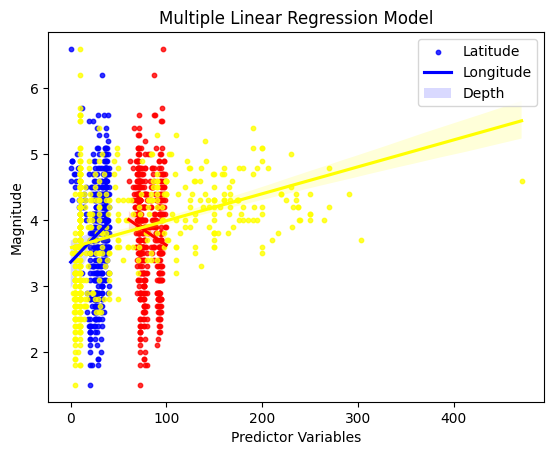

In [41]:
# 5. **Linear Regression**

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt

# Load and train the Linear Regression model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predict using the test data
y_pred_lr = regressor.predict(X_test)

# Evaluate the model's performance
r2_lr = r2_score(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)

print(f"Linear Regression - R^2: {r2_lr:.2f}, MSE: {mse_lr:.2f}")

# Plotting the results
sns.regplot(x=X_test['Latitude'], y=y_test, color='blue', scatter_kws={'s': 10})
sns.regplot(x=X_test['Longitude'], y=y_test, color='red', scatter_kws={'s': 10})
sns.regplot(x=X_test['Depth'], y=y_test, color='yellow', scatter_kws={'s': 10})
plt.legend(labels=['Latitude', 'Longitude', 'Depth'])
plt.xlabel('Predictor Variables')
plt.ylabel('Magnitude')
plt.title('Multiple Linear Regression Model')
plt.show()

SVM R^2: -0.81
SVM - R^2: -0.81, MSE: 1.12


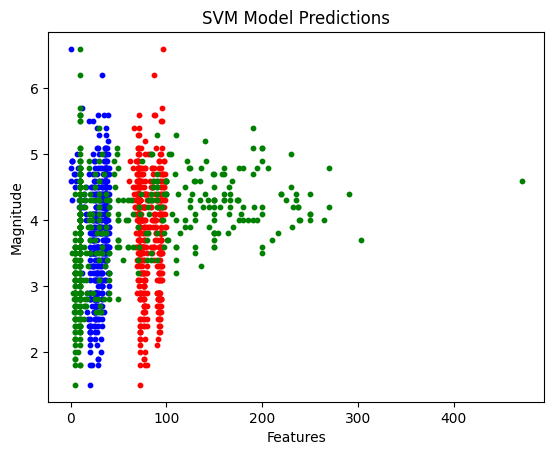

In [42]:
# 6. **Support Vector Machine (SVM)**

from sklearn.svm import SVR

# Train the SVM model on a subset of the training data
svm = SVR(kernel='rbf', C=1e3, gamma=0.1)
svm.fit(X_train, y_train)

# Evaluate the SVM model on the test data
r2_svm = svm.score(X_test, y_test)
print(f"SVM R^2: {r2_svm:.2f}")

# Predict using the SVM model
y_pred_svm = svm.predict(X_test)

# Compute and display R^2 and MSE for SVM
r2_svm = r2_score(y_test, y_pred_svm)
mse_svm = mean_squared_error(y_test, y_pred_svm)
print(f"SVM - R^2: {r2_svm:.2f}, MSE: {mse_svm:.2f}")

# Plotting the SVM model results
plt.scatter(X_test['Latitude'], y_test, color='blue', s=10)
plt.scatter(X_test['Longitude'], y_test, color='red', s=10)
plt.scatter(X_test['Depth'], y_test, color='green', s=10)
plt.title('SVM Model Predictions')
plt.xlabel('Features')
plt.ylabel('Magnitude')
plt.show()


Random Forest - R^2: 0.52, MSE: 0.30


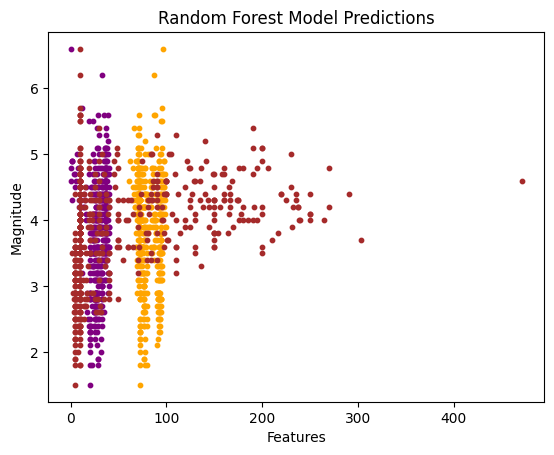

In [43]:
# 7. **Random Forest**

from sklearn.ensemble import RandomForestRegressor

# Initialize and train the Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=0)
rf.fit(X_train, y_train)

# Predict using the Random Forest model
y_pred_rf = rf.predict(X_test)

# Evaluate the Random Forest model's performance
r2_rf = r2_score(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f"Random Forest - R^2: {r2_rf:.2f}, MSE: {mse_rf:.2f}")

# Plotting Random Forest results
plt.scatter(X_test['Latitude'], y_test, color='purple', s=10)
plt.scatter(X_test['Longitude'], y_test, color='orange', s=10)
plt.scatter(X_test['Depth'], y_test, color='brown', s=10)
plt.title('Random Forest Model Predictions')
plt.xlabel('Features')
plt.ylabel('Magnitude')
plt.show()

In [44]:
# 8. **Concluding the Accurate Model**

# Compare the performance metrics of all models
models = ['Linear Regression', 'SVM', 'Random Forest']
r2_scores = [r2_lr, r2_svm, r2_rf]
mse_scores = [mse_lr, mse_svm, mse_rf]

# Display the comparison
model_comparison = pd.DataFrame({'Model': models, 'R^2': r2_scores, 'MSE': mse_scores})
display(model_comparison)

# Conclusion: Random Forest is chosen based on the best R^2 and MSE performance

,Model,R^2,MSE
0,Linear Regression,0.129640,0.537967
1,SVM,-0.810997,1.119370
2,Random Forest,0.515443,0.299503
